In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from keras.models import Sequential
from keras.layers import Dense

In [2]:
df = pd.read_csv("d:\\jupyter\\obesity\\ObesityDataSet_raw_and_data_sinthetic.csv")
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
nulldf= df.isnull().sum()

In [7]:
df.shape

(2111, 17)

In [8]:
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,170,3.0,2,0,2.0,0,0.0,840,no,3,1
1,0,21.0,1.52,56.0,1,0,809,3.0,2,1,3.0,1,3.0,0,Sometimes,3,1
2,1,23.0,1.80,77.0,1,0,170,3.0,2,0,2.0,0,2.0,840,Frequently,3,1
3,1,27.0,1.80,87.0,0,0,809,3.0,2,0,2.0,0,2.0,0,Frequently,4,5
4,1,22.0,1.78,89.8,0,0,170,1.0,2,0,2.0,0,0.0,0,Sometimes,3,6
5,1,29.0,1.62,53.0,0,1,170,3.0,2,0,2.0,0,0.0,0,Sometimes,0,1
6,0,23.0,1.50,55.0,1,1,809,3.0,2,0,2.0,0,1.0,0,Sometimes,2,1
7,1,22.0,1.64,53.0,0,0,170,3.0,2,0,2.0,0,3.0,0,Sometimes,3,1
8,1,24.0,1.78,64.0,1,1,809,3.0,2,0,2.0,0,1.0,840,Frequently,3,1
9,1,22.0,1.72,68.0,1,1,170,3.0,2,0,2.0,0,1.0,840,no,3,1


In [9]:
df.dtypes

Gender                              int64
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight      int64
FAVC                                int64
FCVC                                int64
NCP                               float64
CAEC                                int64
SMOKE                               int64
CH2O                              float64
SCC                                 int64
FAF                               float64
TUE                                 int64
CALC                               object
MTRANS                              int64
NObeyesdad                          int64
dtype: object

In [10]:
df.groupby('NObeyesdad').size()

NObeyesdad
0    272
1    287
2    351
3    297
4    324
5    290
6    290
dtype: int64

<Axes: ylabel='Frequency'>

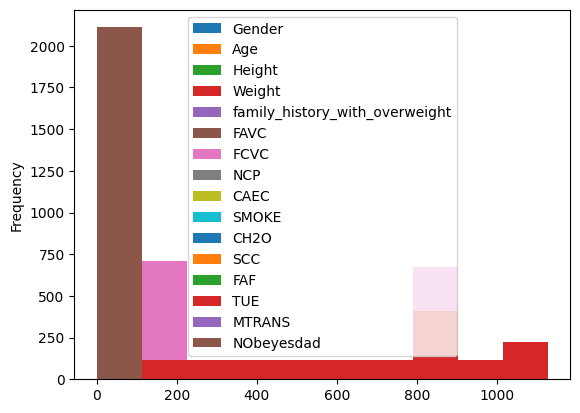

In [5]:
df.plot.hist()

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  

correlations =df.corr()
# plot correlation matrix

myfig = plt.figure()
axis = myfig.add_subplot(111) # There is only one subplot or graph;
# "111" means "1x1 grid, first subplot"

cax = axis.matshow(correlations, vmin =-1, vmax = 1)
myfig.colorbar(cax)
ticks = np.arange(0, 17, 1) # np.arange(start, stop, step); the interval does not include stop value

axis.set_xticks(ticks)
axis.set_yticks(ticks)

plt.show()

ValueError: could not convert string to float: 'no'

In [11]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

data = df.values
X = data[:,0:16]
Y = data[:,16]
mydataScaler = MinMaxScaler(feature_range = (0, 1))
mydataRescaled = mydataScaler.fit_transform(X)
set_printoptions(precision = 3)
print(mydataRescaled[20:25,:])

ValueError: could not convert string to float: 'no'

In [12]:
from sklearn.preprocessing import Normalizer
from numpy import set_printoptions

mydata_train=data[:,0:16]
mydata_label=data[:,16]
mydataScaler=Normalizer().fit(mydata_train)
mydataNormalized=mydataScaler.transform(mydata_train)
set_printoptions(precision=3)
print(mydataNormalized[20:25,:])

ValueError: could not convert string to float: 'no'

In [20]:
from sklearn.preprocessing import Binarizer

mydata_train=data[:,0:16]
mydata_label=data[:,16]
mydataBinarizer=Binarizer(threshold=0.0).fit(mydata_train)
mydatabinarized=mydataBinarizer.transform(mydata_train)
set_printoptions(precision=3)
print(mydatabinarized[0:5,:])

[[0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1.]
 [0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1.]
 [1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1.]]


In [22]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

data=df.values
mydata_train=data[:,0:16]
mydata_label=data[:,16]
#featureextraction
myFeature=SelectKBest(score_func=chi2,k=4) #kisnumberoftopfeaturestoselect
fit=myFeature.fit(mydata_train,mydata_label)
#summarizescores
set_printoptions(precision=3)
print(fit.scores_)

[3.250e+02 6.356e+02 1.066e+00 1.419e+04 1.134e+02 2.708e+01 6.032e+01
 3.378e+01 4.679e+01 3.147e+01 1.740e+01 1.174e+02 7.176e+01 2.613e+01
 2.182e+01 1.028e+02]


In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

data=df.values

mydata_train= data[:,0:16]
mydata_label= data[:,16]
# featureextraction
model=LogisticRegression()
mydataRFE= RFE(model,n_features_to_select=3)
mydataFit=mydataRFE.fit(mydata_train,mydata_label)
print("Numberoffeatures:%d" %mydataFit.n_features_)
print("SelectedfeaturesaredenotedbyTrue:%s"%mydataFit.support_)
print("FeatureRanking:%s" %mydataFit.ranking_)

C:\Users\elahehba\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\elahehba\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

Numberoffeatures:3
SelectedfeaturesaredenotedbyTrue:[ True False  True False False False  True False False False False False
 False False False False]
FeatureRanking:[ 1 12  1 11  2  3  1  6  4 14  9 13 10  8  5  7]


C:\Users\elahehba\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\elahehba\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

In [25]:
from sklearn.decomposition import PCA

# featureextraction
pca=PCA(n_components=3)
fit=pca.fit(mydata_train)
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.941 0.054 0.001]
[[ 3.087e-03  5.193e-02  1.642e-03  9.986e-01  7.337e-03  3.328e-03
   4.394e-03  3.166e-03  5.143e-03  1.462e-04  4.665e-03 -1.612e-03
  -1.724e-03 -1.745e-03 -4.064e-03 -1.444e-04]
 [ 1.337e-03  9.899e-01 -1.866e-03 -5.156e-02  6.303e-03  3.786e-04
  -2.735e-03 -8.377e-03  1.771e-03  1.986e-03 -8.927e-03 -2.482e-03
  -1.868e-02 -2.820e-02  7.560e-06 -1.272e-01]
 [-1.390e-01  1.042e-01 -3.046e-02 -4.344e-03 -2.002e-02 -1.435e-02
   4.375e-02 -2.546e-01 -1.016e-02  5.624e-03 -6.440e-02 -2.510e-03
  -3.379e-01 -1.766e-02 -1.891e-02  8.845e-01]]


In [26]:
pca=PCA(0.92)
selectedFeatures = pca.fit_transform(mydata_train)
print(selectedFeatures.shape)

(2111, 1)


In [27]:
from sklearn.ensemble import ExtraTreesClassifier

# feature extraction
model = ExtraTreesClassifier()
model.fit(mydata_train, mydata_label)
print(model.feature_importances_)

[0.088 0.077 0.079 0.277 0.044 0.025 0.074 0.057 0.038 0.004 0.044 0.012
 0.042 0.046 0.055 0.038]


In [15]:

from sklearn.metrics import accuracy_score


label_encoders = {}
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


X = df.drop('NObeyesdad', axis=1)  
y = df['NObeyesdad']  



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)





model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  
model.add(Dense(32, activation='relu')) 
model.add(Dense(len(np.unique(y)), activation='softmax')) 


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=1)


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1) 


accuracy = accuracy_score(y_test, y_pred_classes)
print("دقت مدل:", accuracy)


Epoch 1/100


c:\Users\elahehba\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3481 - loss: 1.7593 - val_accuracy: 0.6243 - val_loss: 1.1732
Epoch 2/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6403 - loss: 1.0968 - val_accuracy: 0.7041 - val_loss: 0.8328
Epoch 3/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7269 - loss: 0.7987 - val_accuracy: 0.7811 - val_loss: 0.6389
Epoch 4/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8071 - loss: 0.6018 - val_accuracy: 0.8107 - val_loss: 0.5369
Epoch 5/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8553 - loss: 0.4622 - val_accuracy: 0.8402 - val_loss: 0.4408
Epoch 6/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8697 - loss: 0.3782 - val_accuracy: 0.8905 - val_loss: 0.3699
Epoch 7/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9016 - loss: 0.3210 - val_accuracy: 0.8964 - val_loss: 0.3327
Epoch 8/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9320 - loss: 0.2807 - val_accuracy: 0.9112

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


for col in df.columns:
    if df[col].dtype == 'object':  
        df[col] = encoder.fit_transform(df[col])

X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# اعمال مدل KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)

y_pred = knn.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy : {accuracy:.4f}')



Accuracy : 0.7943


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


label_encoder = LabelEncoder()
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ایجاد و آموزش مدل Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_scaled, y_train)

y_pred = random_forest.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")



Accuracy: 0.9574468085106383


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


label_encoder = LabelEncoder()
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ایجاد و آموزش مدل Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train)

y_pred = decision_tree.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")



Accuracy: 0.933806146572104


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


label_encoder = LabelEncoder()
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ایجاد و آموزش مدل Logistic Regression
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

y_pred = logistic_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.8794326241134752


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

label_encoder = LabelEncoder()
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ایجاد و آموزش مدل SVM
svm_model = SVC(kernel='rbf', random_state=42) 
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")


Accuracy: 0.8841607565011821
